In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer-
from nltk.sentiment.util import *
from sklearn.utils import shuffle
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
from nltk.util import ngrams
import re, string, unicodedata

plt.style.use('ggplot')

In [2]:
sentiment = SentimentIntensityAnalyzer()

In [3]:
data = pd.read_csv('ic_news_202203011540.csv')
data.columns = [col.replace(' ', '_').lower() for col in data.columns]
data.head(100)

,id,user_id,uuid_org,uri,title,body,url,is_verified,source,date,...,author,created_at,updated_at,short_description,status,is_input,is_mediastack,category,is_trending,id_news_data_list
0,1,NaN,NaN,6698797800,Whatsapp Payment Feature: WhatsApp may soon b...,"Currently, a user has to open the Chat action ...",https://timesofindia.indiatimes.com/gadgets-ne...,1,NaN,2021-08-23,...,NaN,2021-08-23 16:25:16,2021-08-23 16:25:17,NaN,1,0,1,news,0,NaN
1,2,NaN,NaN,6698797568,"Cadila, Aurobindo, Divis Lab and Sun Pharma ke...","""Prevent Unauthorized Transactions in your dem...",https://www.indiainfoline.com/article/news-sec...,1,NaN,2021-08-23,...,NaN,2021-08-23 16:25:17,2021-08-23 16:25:18,NaN,1,0,1,news,0,NaN
2,3,NaN,NaN,6698795638,"Bitcoin breaks through $50,000 in major reboun...","The world's number one cryptocurrency, bitcoin...",https://www.rt.com/business/532787-bitcoin-reb...,1,NaN,2021-08-23,...,NaN,2021-08-23 16:25:18,2021-08-23 16:25:18,NaN,1,0,1,news,0,NaN
3,4,NaN,NaN,6698796073,Yemen to get $655 mln of IMF reserves in new S...,"ADEN, Aug 23 (Reuters) - Yemen will receive ab...",https://www.egyptindependent.com/yemen-to-get-...,1,NaN,2021-08-23,...,NaN,2021-08-23 16:25:19,2021-08-23 16:25:19,NaN,1,0,1,news,0,NaN
4,5,NaN,NaN,6698794811,ASPI surpasses fair value; reduce equity expos...,"With the ASPI surging past the 8,000 mark for ...",https://www.lankabusinessonline.com/aspi-surpa...,1,NaN,2021-08-23,...,NaN,2021-08-23 16:25:19,2021-08-23 16:25:20,NaN,1,0,1,news,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,110,NaN,17818d55-4f93-94b1-6b80-575a7cdc5878,6698144940,"The Tampa affair, 20 years on: the ship that c...",Even to Abbas Nazari's disoriented seven-year-...,https://uk.news.yahoo.com/tampa-affair-20-year...,1,NaN,2021-08-22,...,NaN,2021-08-25 21:46:36,2021-08-25 21:46:38,NaN,1,0,1,news,0,NaN
96,111,NaN,17818d55-4f93-94b1-6b80-575a7cdc5878,6697846119,Liang-Chi Wang,Paleoecological data can be used to inform nat...,https://sciprofiles.com/profile/1375077,1,NaN,2021-08-22,...,NaN,2021-08-25 21:46:39,2021-08-25 21:46:41,NaN,1,0,1,news,0,NaN
97,112,NaN,17818d55-4f93-94b1-6b80-575a7cdc5878,6696490210,'Factorial Energy' Is One Of The Fore Runners ...,The mobility industry as we know is about to c...,https://www.topspeed.com/cars/car-news/factori...,1,NaN,2021-08-21,...,NaN,2021-08-25 21:46:42,2021-08-25 21:46:45,NaN,1,0,1,news,0,NaN
98,113,NaN,17818d55-4f93-94b1-6b80-575a7cdc5878,6688851045,Why the youth are key in leading energy revolu...,AU probes tweet blasting US call for Tigray di...,https://kenyandigest.com/why-the-youth-are-key...,1,NaN,2021-08-15,...,NaN,2021-08-25 21:46:46,2021-08-25 21:46:49,NaN,1,0,1,news,0,NaN


In [4]:
processing_data1=[]
for d in data['body']:
    processing_data1.append(TextBlob(str(d).replace('[^\w\s]','').replace(",", "").replace(".", "").replace("!", "").replace("?", "")      .replace(";", "").replace(":", "")
                                .replace("*", "").replace("(", "").replace(")", "").replace("/", "").lower()).split(" "))

In [5]:
stop_words1=set(stopwords.words('english'))
stop_words1.add('I')
stop_words1.add('(')
stop_words1.add(')')
stop_words1.add(',')
rem=["won't","aren't","don't",'hadn''mightn','didn',"hadn't",'shouldn','no',"couldn't","doesn't",'nor', 'hasn',"shouldn't",'mustn','wasn','than',
     "shan't",'don','aren',"wasn't",'not','against', 'haven',"needn't","isn't",'weren',"wouldn't","weren't","you're", "mightn't","didn't","haven't","hasn't","mustn't"]

stop_words=[]
for w in stop_words1:
    if w not in rem:
        stop_words.append(w)

lemmatizer = WordNetLemmatizer()
processing_data2=[]
for a in processing_data1:
  temp=[]
  for b in a:
      if b not in stop_words:
       temp.append(lemmatizer.lemmatize(b,pos='a'))
  processing_data2.append(temp)

In [6]:
processing_data_response=[]
processing_data3=[]
all_words=[]
aaaa=0
for d in processing_data2:
    sum=0
    for a in d:
        ppp=float(TextBlob(a).sentiment[0])
        sum += ppp

    processing_data_response.append(sum)
    processing_data3.append([d, processing_data_response[aaaa]])
    aaaa+=1

In [8]:
np.random.shuffle(processing_data3)
training_data=processing_data3[:15000]
testing_data=processing_data3[15000:]
classes=[1,0]
print("size of the training data set is: ",len(training_data))
print("size of the testing data set is: ",len(testing_data))
positive_words={}
negative_words={}

size of the training data set is:  9326
size of the testing data set is:  0


In [9]:
def print_sentiment_scores(sentence):
    snt = sentiment.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [10]:
print('polarity score-compound: ', sentiment.polarity_scores('It was a good experience :)')['compound'])

polarity score-compound:  0.7096


In [12]:
data['polarity_score'] = data['body'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])

In [13]:
data[['body','polarity_score']][0:5]

,body,polarity_score
0,"Currently, a user has to open the Chat action ...",0.9313
1,"""Prevent Unauthorized Transactions in your dem...",0.2960
2,"The world's number one cryptocurrency, bitcoin...",0.9054
3,"ADEN, Aug 23 (Reuters) - Yemen will receive ab...",-0.5423
4,"With the ASPI surging past the 8,000 mark for ...",0.9773


In [14]:
data['sentiment']=''
data['polarity']=''

In [15]:
data.loc[(data.polarity_score<=1) & (data.polarity_score>=0.5),'sentiment']='V.Positive'
data.loc[(data.polarity_score<0.5) & (data.polarity_score>0),'sentiment']='Positive'
data.loc[(data.polarity_score==0),'sentiment']='Neutral'
data.loc[(data.polarity_score<0) & (data.polarity_score>=-0.5),'sentiment']='Negative'
data.loc[(data.polarity_score<-0.5) & (data.polarity_score>=-1),'sentiment']='V.Negative'

In [16]:
data.loc[(data.polarity_score<=1) & (data.polarity_score>0),'polarity']='positive'
data.loc[(data.polarity_score==0),'polarity']='neutral'
data.loc[(data.polarity_score<0) & (data.polarity_score>=-1),'polarity']='negative'

<AxesSubplot:title={'center':'Sentiment Distribution - All Reviews'}, xlabel='Sentiment', ylabel='Count of Reviews'>

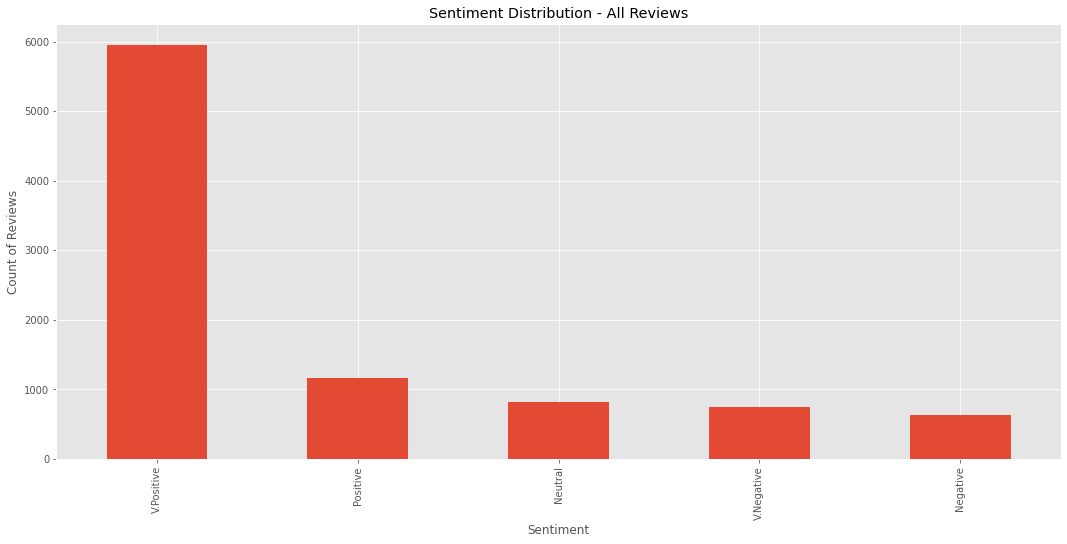

In [17]:
%matplotlib inline
plt.figure(figsize=(18,8))
plt.xlabel("Sentiment")
plt.ylabel("Count of Reviews")
data.sentiment.value_counts().plot(kind='bar', title="Sentiment Distribution - All Reviews")

<AxesSubplot:title={'center':'Polarity Distribution - All Tweets'}, xlabel='Polarity', ylabel='Count of Reviews'>

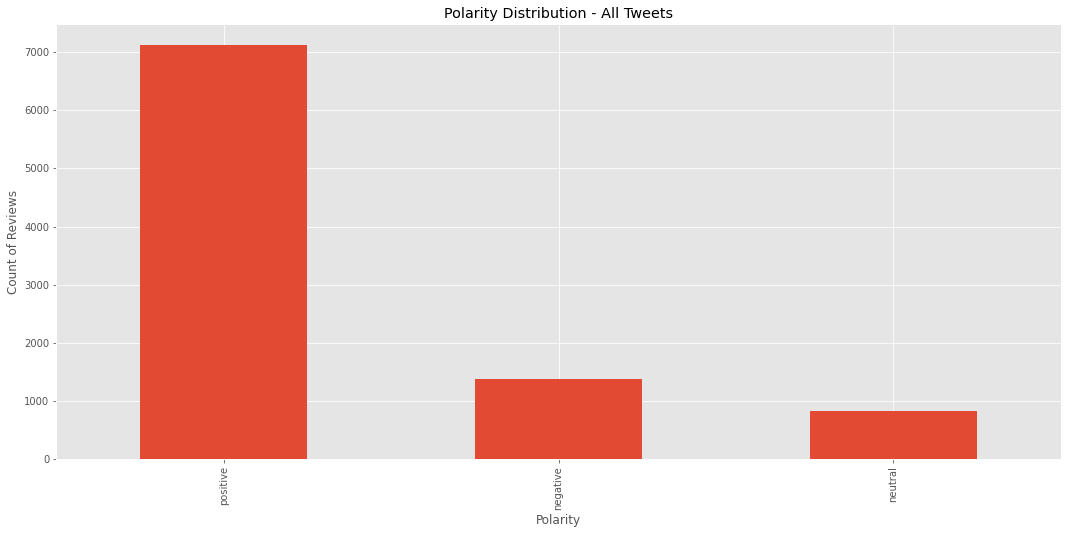

In [18]:
plt.figure(figsize=(18,8))
plt.xlabel("Polarity")
plt.ylabel("Count of Reviews")
data.polarity.value_counts().plot(kind='bar', title="Polarity Distribution - All Tweets")

In [19]:
def train_naive_bayes(training, classes):
    all_data = [[]] * len(classes)

    no_doc = [None] * len(classes)

    log_prior_prob = [None] * len(classes)

    loglikelihood = [None] * len(classes)
    for obs in training:  
        if obs[1] >=0:
           all_data[1] = all_data[1] + [obs] 
        else :
            all_data = all_data + [obs]
    vocabulary= []
    for dd in training:
        if dd[1]>=0:
           for word in dd[0]:
               if word not in vocabulary:
                   vocabulary.append(word)
               if positive_words.get(word)is not None:
                   positive_words[word]=positive_words[word]+1
               else:
                    positive_words[word]=1
        else:
            for word in dd[0]:
                if word not in vocabulary:
                    vocabulary.append(word)
                if negative_words.get(word)is not None:
                   negative_words[word] += 1
                else:
                    negative_words[word]=1

    vocabulary_size = len(vocabulary)
    total = len(training)
    for index in range(len(classes)):
        no_doc[index] = len(all_data[index])

        log_prior_prob[index] = np.log((no_doc[index] + 1) / total)

        count_w_in_vocabulary = 0
        for d in all_data[index]:
            count_w_in_vocabulary = count_w_in_vocabulary + len(d[0])
        denom = count_w_in_vocabulary + vocabulary_size

        dict = {}
        for wi in vocabulary:
            count_wi_in_all_data = 0
            for d in all_data[index]:
                for word in d[0]:
                    if word == wi:
                        count_wi_in_all_data = count_wi_in_all_data + 1
            numer = count_wi_in_all_data + 1
            dict[wi] = np.log((numer) / (denom))
        loglikelihood[index] = dict

    return (vocabulary, log_prior_prob, loglikelihood)

p,q,r=train_naive_bayes(training_data,classes)

def test_naive_bayes(test_docs, log_prior, log_likeli_hood, vocabulary):
  count = 0

  for ddd in test_docs:
    log_post_prob = [None] * len(classes)
    for index in classes:
        sumloglikelihoods = 0
        for word in ddd:
            if word in vocabulary:
                sumloglikelihoods += log_likeli_hood[index][word]

        log_post_prob[index] = log_prior[index] + sumloglikelihoods

    pp = 0
    if ddd[1] >= 0:
       pp = 1
    if log_post_prob.index(max(log_post_prob)) == pp:
           count += 1


  return count * 100 / len(test_docs)

pp=test_naive_bayes(testing_data,q,r,p)

KeyboardInterrupt: 

In [ ]:
kd=pd.DataFrame({'Positive_words':list(positive_words.keys())[:],'Frequency':list(positive_words.values())[:]})
kd.to_csv('D:/Shree/Sentiment/positive_words.csv', sep=',', encoding='utf-8', index=False, header=True,columns=['Positive_words','Frequency'])
kd=pd.DataFrame({'Negative_words':list(negative_words.keys())[:],'Frequency':list(negative_words.values())[:]})
kd.to_csv('D:/Shree/Sentiment/negative_words.csv', sep=',', encoding='utf-8', index=False, header=True,columns=['Negative_words','Frequency'])

In [20]:
data.head(30)

,id,user_id,uuid_org,uri,title,body,url,is_verified,source,date,...,short_description,status,is_input,is_mediastack,category,is_trending,id_news_data_list,polarity_score,sentiment,polarity
0,1,NaN,NaN,6698797800,Whatsapp Payment Feature: WhatsApp may soon b...,"Currently, a user has to open the Chat action ...",https://timesofindia.indiatimes.com/gadgets-ne...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.9313,V.Positive,positive
1,2,NaN,NaN,6698797568,"Cadila, Aurobindo, Divis Lab and Sun Pharma ke...","""Prevent Unauthorized Transactions in your dem...",https://www.indiainfoline.com/article/news-sec...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.2960,Positive,positive
2,3,NaN,NaN,6698795638,"Bitcoin breaks through $50,000 in major reboun...","The world's number one cryptocurrency, bitcoin...",https://www.rt.com/business/532787-bitcoin-reb...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.9054,V.Positive,positive
3,4,NaN,NaN,6698796073,Yemen to get $655 mln of IMF reserves in new S...,"ADEN, Aug 23 (Reuters) - Yemen will receive ab...",https://www.egyptindependent.com/yemen-to-get-...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,-0.5423,V.Negative,negative
4,5,NaN,NaN,6698794811,ASPI surpasses fair value; reduce equity expos...,"With the ASPI surging past the 8,000 mark for ...",https://www.lankabusinessonline.com/aspi-surpa...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.9773,V.Positive,positive
5,6,NaN,NaN,6698795551,"Bitcoin Price Today Hits $50,000. Will World's...","Bitcoin surges $50,000 on Monday - which happe...",https://www.news18.com/news/business/bitcoin-p...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.9738,V.Positive,positive
6,7,NaN,NaN,6698791657,Lift in oil prices spark recovery in stock mar...,"SYDNEY, NSW, Australia - Stocks in Asia took o...",https://www.northkoreatimes.com/news/270837402...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.9350,V.Positive,positive
7,8,NaN,NaN,6698791709,From the past pages of dawn: 1971: fifty years...,KARACHI: The problem of pollution of sea water...,https://www.dawn.com/news/1642107,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.7414,V.Positive,positive
8,9,NaN,NaN,6698788443,China Tech Shares Stage Rebound After Five-Wee...,(Bloomberg) -- Chinese technology stocks ralli...,https://www.caixinglobal.com/2021-08-23/china-...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.8103,V.Positive,positive
9,10,NaN,NaN,6698788027,India's Valuation Premium Over Emerging Market...,India's valuation premium over emerging market...,https://www.timesnownews.com/videos/et-now/new...,1,NaN,2021-08-23,...,NaN,1,0,1,news,0,NaN,0.8658,V.Positive,positive


In [23]:
df = data[['body','polarity']]

In [24]:
df

,body,polarity
0,"Currently, a user has to open the Chat action ...",positive
1,"""Prevent Unauthorized Transactions in your dem...",positive
2,"The world's number one cryptocurrency, bitcoin...",positive
3,"ADEN, Aug 23 (Reuters) - Yemen will receive ab...",negative
4,"With the ASPI surging past the 8,000 mark for ...",positive
...,...,...
9321,Quebec-based startup raised a Series A to exte...,positive
9322,As per the Draft Red Herring Prospectus (DRHP)...,neutral
9323,Asia-Pacific markets mostly gain as investors ...,positive
9324,"Over the last couple of years, there has been ...",neutral


In [25]:
df.to_csv('databaru.csv',index = 0)